In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from PIL import Image
import rasterio

In [2]:
# Read file through rasterio to save with correct reprojection

# First, get the file path and file name for red, green, and blue bands
image_file = '/Users/alexrojas/Documents/Data/NewYork/Imagery/porpoise_channel15/porpoise_channel15.tif'

# Use rasterio.open to open each image and read
img_ds = rasterio.open(image_file, driver="GTiff") # R-G-B-NIR

In [3]:
band1 = img_ds.read(1) # red
band2 = img_ds.read(2) # green
band3 = img_ds.read(3) # blue
band4 = img_ds.read(4) # nir

In [12]:
img_ds.count

4

In [13]:
img_ds.width

12024

In [15]:
img_ds.height

15300

In [16]:
img_ds.dtypes

('uint8', 'uint8', 'uint8', 'uint8')

In [18]:
img_ds.crs

CRS.from_epsg(26918)

In [19]:
dir(img_ds)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_block_shapes',
 '_closed',
 '_count',
 '_crs',
 '_crs_wkt',
 '_descriptions',
 '_dtypes',
 '_env',
 '_gcps',
 '_get_crs',
 '_handle_crswkt',
 '_has_band',
 '_mask_flags',
 '_nodatavals',
 '_offsets',
 '_read',
 '_scales',
 '_set_all_descriptions',
 '_set_all_offsets',
 '_set_all_scales',
 '_set_all_units',
 '_set_attrs_from_dataset_handle',
 '_set_crs',
 '_set_gcps',
 '_set_nodatavals',
 '_transform',
 '_units',
 'block_shapes',
 'block_size',
 'block_window',
 'block_windows',
 'bounds',
 'checksum',
 'close',
 'closed',
 'colorinterp',
 'colormap',
 'compr

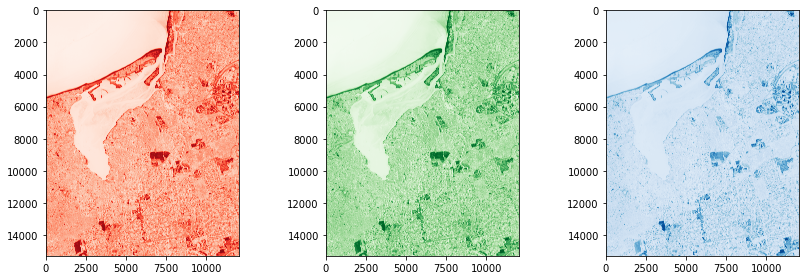

In [21]:
# Plot the R-G-B bands seperately in subplots
from rasterio import plot
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,4))
plot.show(band1, ax=ax1, cmap='Reds')
plot.show(band2, ax=ax2, cmap='Greens')
plot.show(band3, ax=ax3, cmap='Blues')

fig.tight_layout()

In [5]:
## Open image tif using PIL Image.Open, and split bands

Image.MAX_IMAGE_PIXELS = None

src_img = '/Users/alexrojas/Documents/Data/NewYork/Imagery/porpoise_channel15/porpoise_channel15.tif'
pil_img = Image.open(src_img)

# Split bands into seperate PIL image objects
r_pil, g_pil, b_pil, nir_pil = Image.Image.split(pil_img)

# Convert each band into a numpy array
r_array = np.array(r_pil)
g_array = np.array(g_pil)
b_array = np.array(b_pil)
nir_array = np.array(nir_pil)

# Create a RGB composite
rgb_array = np.dstack((r_array, g_array, b_array))

# Create a NIR-R-G composite
nir_rg_array = np.dstack((nir_array, r_array, g_array))

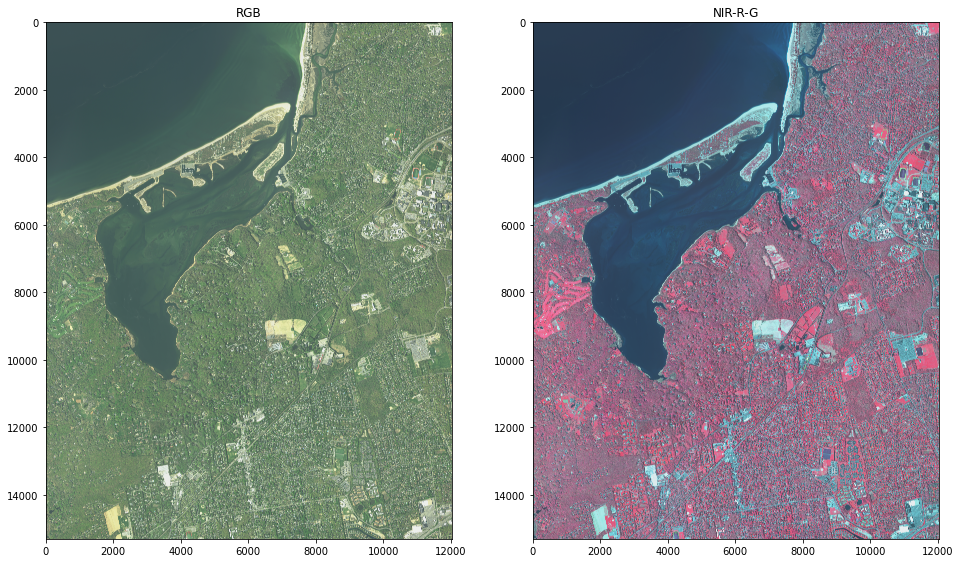

In [3]:
# Display RGB and NIR-R-G for visualization purposes

fig=plt.figure(figsize=(16,12))

# display rgb
a = fig.add_subplot(1,2,1)
rgb_plot = plt.imshow(rgb_array)
a.set_title('RGB')

# display nir-r-g
a = fig.add_subplot(1,2,2)
nirrg_plot = plt.imshow(nir_rg_array)
a.set_title('NIR-R-G')

plt.show()

In [6]:
## Calculate the NDVI
# use the arrays read in from PIL
# also can use the rasterio bands that were read in earlier (i.e. img_ds.read(1))
ndvi=(nir_array.astype(float) - r_array.astype(float)) / (nir_array.astype(float) + r_array.astype(float))

In [24]:
ndvi.min()

-0.6428571428571429

In [25]:
ndvi.max()

0.5266666666666666

In [29]:
ndvi

array([[-0.18446602, -0.2038835 , -0.18      , ...,  0.40740741,
         0.39449541,  0.40061162],
       [-0.16504854, -0.17171717, -0.2       , ...,  0.41104294,
         0.39449541,  0.37724551],
       [-0.18      , -0.16      , -0.19607843, ...,  0.39692308,
         0.38554217,  0.37278107],
       ...,
       [-0.20289855, -0.20863309, -0.2       , ..., -0.02531646,
         0.        ,  0.10447761],
       [-0.2238806 , -0.22962963, -0.21804511, ..., -0.02325581,
         0.01492537,  0.11610487],
       [-0.21481481, -0.26153846, -0.22962963, ..., -0.01052632,
         0.04433498,  0.10931174]])

In [30]:
ndvi.dtype

dtype('float64')

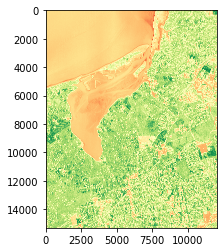

In [10]:
plt.imshow(ndvi, cmap='RdYlGn')
plt.show()

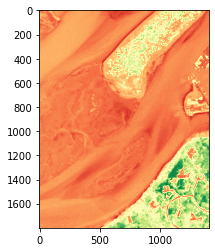

In [13]:
ndvi_sample = ndvi[4000:5800, 5600:7000]
plt.imshow(ndvi_sample, cmap="RdYlGn")

In [7]:
# Save the ndvi raster

# Open a new raster file, and initialize with the same parameters from the L8 scene
# (use any band from the scene to get the parameters)
# the following are the major parameters used to write a new raster file
ndviRaster = rasterio.open('./NAIP-ndvi.tif', 'w', driver='GTiff',
                         width=img_ds.width, height = img_ds.height,
                         count= 1,
                         crs=img_ds.crs,
                         transform=img_ds.transform,
                         dtype='float64',
                         nodata = -9999)

# Write each band to the raster file
ndviRaster.write(ndvi, 1) # write the ndvi band

# Close the raster file
ndviRaster.close()